In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
#read in the data
phones = pd.read_csv('NumberofmobilephonesubscriptionsinEurope1998_2009logistic.csv')

#set years to correct format
phones.iloc[1] = phones.iloc[1].apply(lambda x : str(x))
names = list(phones.iloc[1])

#set years to column names with correct spellings
phones.columns = names
phones.rename(columns = {r'geo\time':'Country', '1999.0':'1999', '2000.0':'2000', '2001.0':'2001', '2002.0':'2002', '2003.0':'2003'}, inplace=True)
phones = phones.drop(columns= ['nan'])

#remove irrelevant data
phones = phones.iloc[6:38]

#view first five rows
phones.head(5)

,Country,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
6,Austria,2293,4206,6117,6541,6736,7095,7991,7747,7585,7391,7255,6945
7,Belgium,1756,3193,5181,6959,7315,7779,8461,8808,9383,10385,11216,11599
8,Bulgaria,131,328,738,1615,2500,3534,4842,6241,8253,9897,10500,10576
9,Croatia,183,361,1112,1731,2340,2551,2842,3646,4321,4768,4866,4031
10,Cyprus,116,152,218,314,418,552,658,783,868,962,1017,1063


In [67]:
#format the data to the correct type per column
def transform_type(df, start_col, end_col, new_type):
    
    #transform the given range to the dtype chosen by the user
    df.iloc[:,start_col:end_col] = df.iloc[:,start_col:end_col].astype(new_type)
    
    #list the column numbers changed and data type
    return(print("Columns {x} through {y} have been changed to data type {z}".format(x = start_col + 1,
                                                                                     y =  end_col,
                                                                                     z = new_type)))
#use the above function to normalize the data set
transform_type(phones, 0, 0, str)
transform_type(phones, 1, len(phones), int)

Columns 1 through 0 have been changed to data type <class 'str'>
Columns 2 through 32 have been changed to data type <class 'int'>


In [75]:
### TRANSFORM THE DATA TO AN INDEXED FORMAT ###

# Identify non-datetime columns to set as index columns
index = phones['Country']

# pivot the dataset based on the index 
indexed_phones = phones.set_index(index)
indexed_phones = indexed_phones.drop(columns = ['Country'])
indexed_phones.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Country,,,,,,,,,,,,
Austria,2293,4206,6117,6541,6736,7095,7991,7747,7585,7391,7255,6945
Belgium,1756,3193,5181,6959,7315,7779,8461,8808,9383,10385,11216,11599
Bulgaria,131,328,738,1615,2500,3534,4842,6241,8253,9897,10500,10576
Croatia,183,361,1112,1731,2340,2551,2842,3646,4321,4768,4866,4031
Cyprus,116,152,218,314,418,552,658,783,868,962,1017,1063


In [76]:
# stack the columns to transform data to long form
indexed_phones = indexed_phones.stack(dropna=False)
indexed_phones.head()

Country      
Austria  1998    2293
         1999    4206
         2000    6117
         2001    6541
         2002    6736
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Country
Austria           AxesSubplot(0.125,0.125;0.775x0.755)
Belgium           AxesSubplot(0.125,0.125;0.775x0.755)
Bulgaria          AxesSubplot(0.125,0.125;0.775x0.755)
Croatia           AxesSubplot(0.125,0.125;0.775x0.755)
Cyprus            AxesSubplot(0.125,0.125;0.775x0.755)
Czech Republic    AxesSubplot(0.125,0.125;0.775x0.755)
Denmark           AxesSubplot(0.125,0.125;0.775x0.755)
Estonia           AxesSubplot(0.125,0.125;0.775x0.755)
Finland           AxesSubplot(0.125,0.125;0.775x0.755)
France            AxesSubplot(0.125,0.125;0.775x0.755)
Germany           AxesSubplot(0.125,0.125;0.775x0.755)
Greece            AxesSubplot(0.125,0.125;0.775x0.755)
Hungary           AxesSubplot(0.125,0.125;0.775x0.755)
Iceland           AxesSubplot(0.125,0.125;0.775x0.755)
Ireland           AxesSubplot(0.125,0.125;0.775x0.755)
Italy             AxesSubplot(0.125,0.125;0.775x0.755)
Latvia            AxesSubplot(0.125,0.125;0.775x0.755)
Lithuania         AxesSubplot(0.125,0.125;0.775x0.755)
Lu

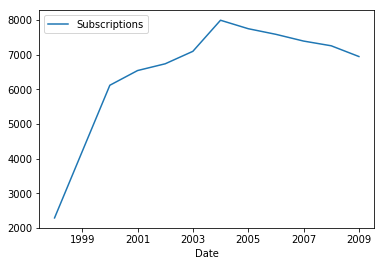

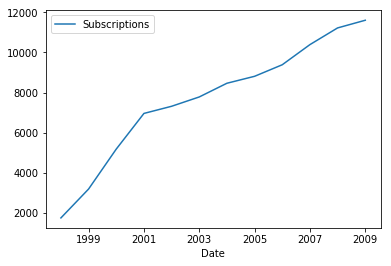

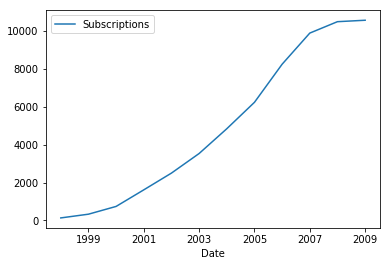

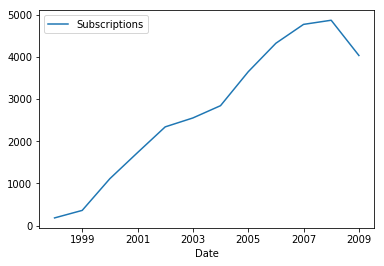

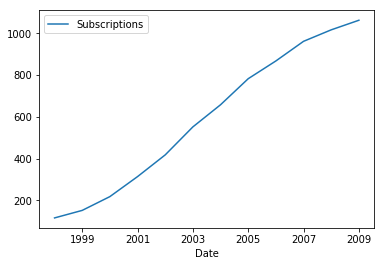

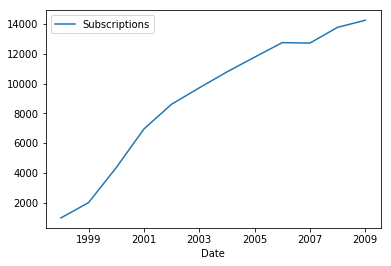

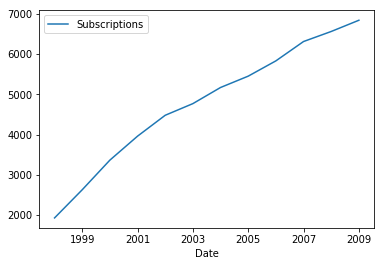

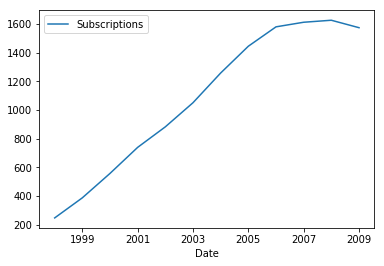

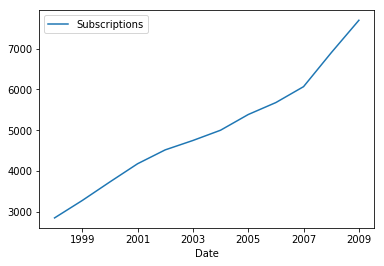

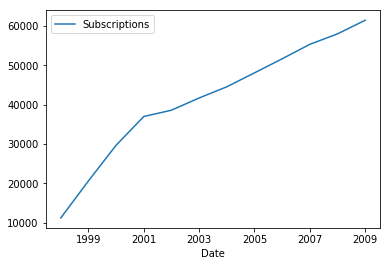

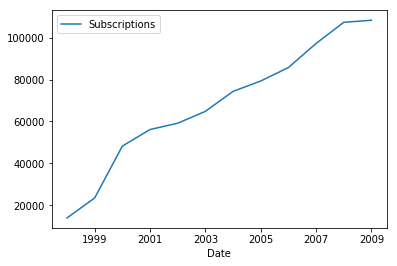

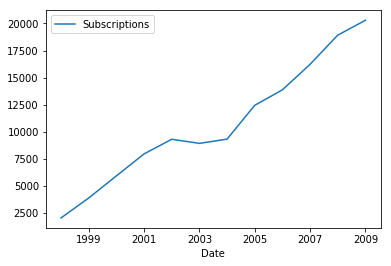

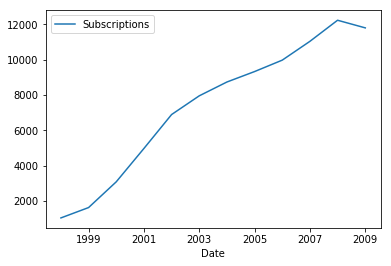

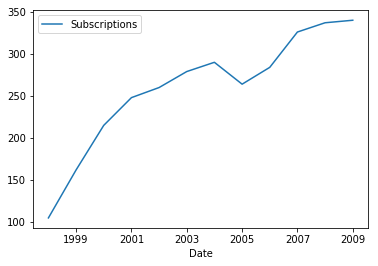

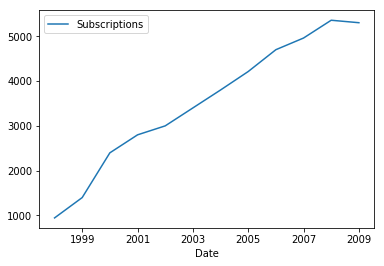

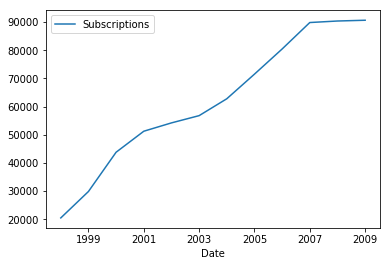

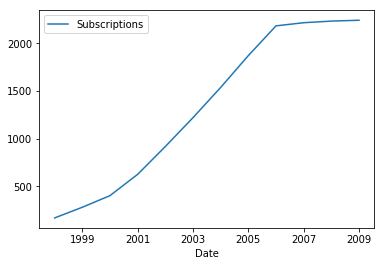

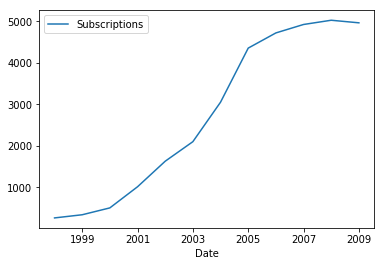

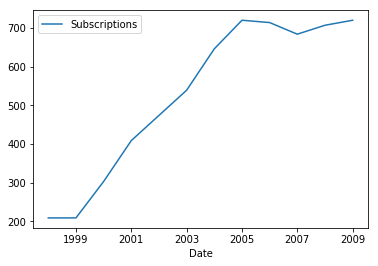

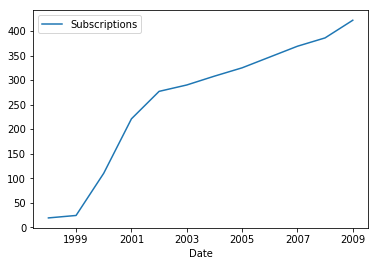

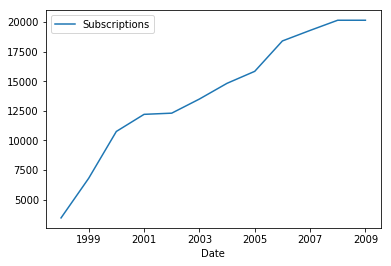

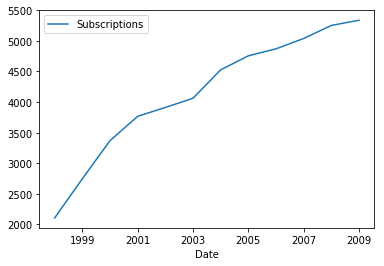

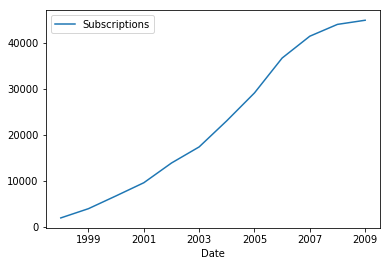

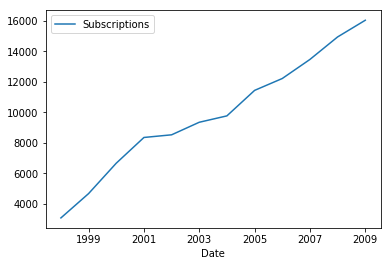

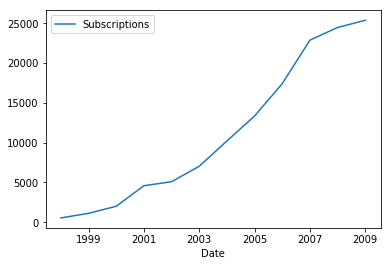

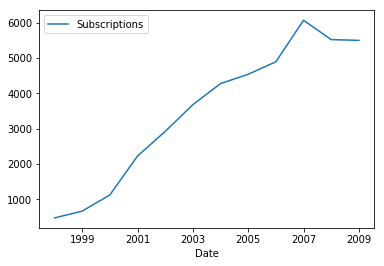

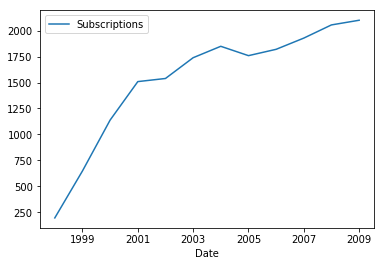

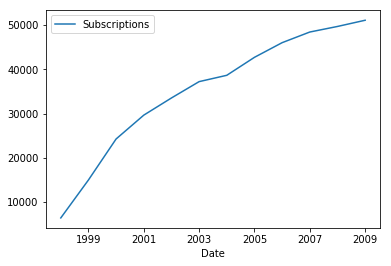

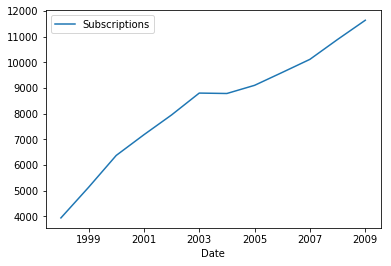

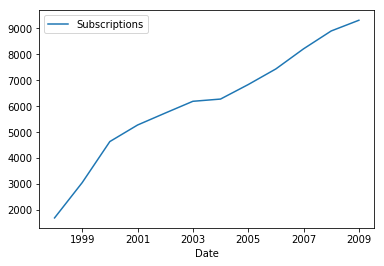

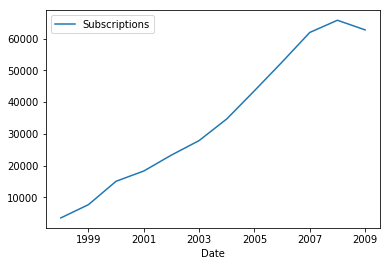

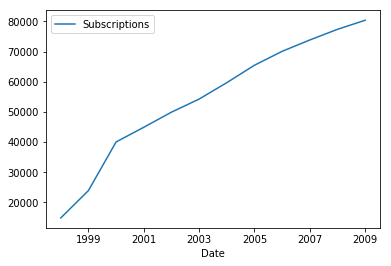

In [99]:
#put the correct data in each row by unstacking the new layout
cleaned_phones = indexed_phones.reset_index()
cleaned_phones.rename(columns = {'level_1':'Date', 0:'Subscriptions'}, inplace=True)
cleaned_phones = cleaned_phones[['Date', 'Subscriptions', 'Country']]
cleaned_phones['Date'] = pd.to_datetime(cleaned_phones['Date'])
cleaned_phones['Date'] = cleaned_phones['Date'].apply(lambda x: x.date())
cleaned_phones = cleaned_phones.set_index(cleaned_phones['Date'])
cleaned_phones.groupby(['Country']).plot()